(friends-s01:r2_central)=
# R2 in central structures
This analysis is supplementary to the results reported in{ref} `friends-s01:r2_cortex`. The difference is that here the summary statistics are computed in a mask including the thalami and basal ganglia, instead of the cortex.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from cneuromod_embeddings.r2_summary import _r2_intra, _r2_inter, _r2_other

sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

## R2 with `fwhm=5`

### DYPAC intra vs DIUFMO
Unlike the cortex, DYPAC parcellations (`cluster-300_state-900`) do not embed precisely fMRI time series in central structures. The difference with `DIFUMO256` is rather small, but it gets outperformed by `DIFUMO512` and `DIFUMO1024`.

In [2]:
path_data = '/home/pbellec/git/cneuromod_embeddings/cneuromod_embeddings/friends-s01/'
path_results = os.path.join(path_data, 'r2_friends-s01_central')

fwhm = 5

# DYPAC
dypac60  = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-60.p')
dypac120 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-120.p')
dypac150 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-150.p')
dypac300 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-300.p')
dypac900 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-300_state-900.p')

# DYPAC inter-subject
inter60  = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-60.p')
inter120 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-120.p')
inter150 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-150.p')
inter300 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-300.p')
inter900 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-300_state-900.p')

# DIFUMO
difumo256  = os.path.join(path_results, f'r2_fwhm-difumo256_fwhm-{fwhm}.p')
difumo512  = os.path.join(path_results, f'r2_fwhm-difumo512_fwhm-{fwhm}.p')
difumo1024 = os.path.join(path_results, f'r2_fwhm-difumo1024_fwhm-{fwhm}.p')

# MIST
mist197 = os.path.join(path_results, f'r2_fwhm-mist197_fwhm-{fwhm}.p')
mist444 = os.path.join(path_results, f'r2_fwhm-mist444_fwhm-{fwhm}.p')

# Schaefer
schaefer = os.path.join(path_results, f'r2_fwhm-schaefer_fwhm-{fwhm}.p')

# Smith
smith70 = os.path.join(path_results, f'r2_fwhm-smith_fwhm-{fwhm}.p')

Text(0.5, 1.0, 'FWHM=5')

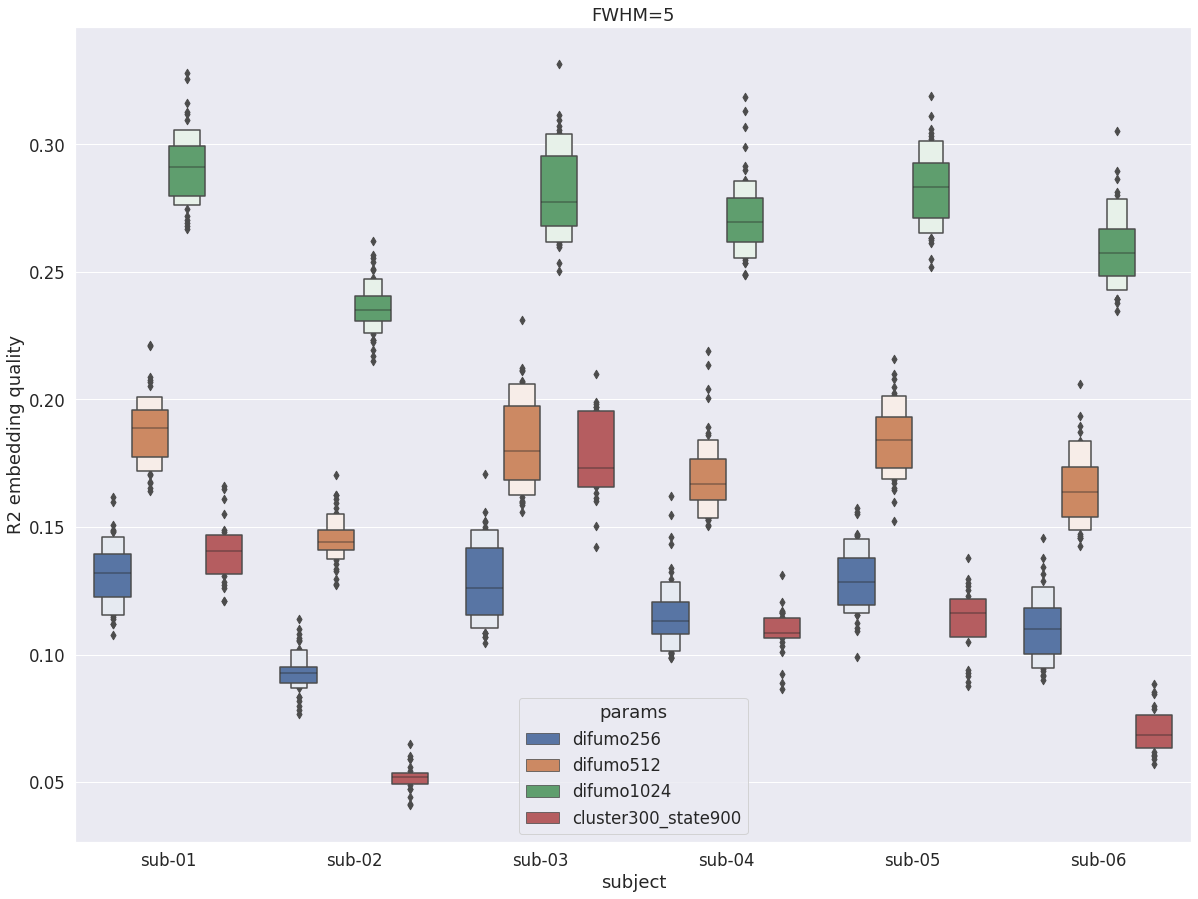

In [3]:
val_r2 = pd.read_pickle(difumo256)
val_r2 = val_r2.append(pd.read_pickle(difumo512))
val_r2 = val_r2.append(pd.read_pickle(difumo1024))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### DYPAC intra vs other group parcellations
DYPAC parcellation (`cluster-300_state-900`) is still competitive with more traditional group parcellations, having the best R2 in 4/6 subjects, and near the top for the two other subjects. However, the dimensionality of DYPAC tested here is also higher than even the most detailed group parcellation (`mist444`). It should also be noted that the Schaefer parcellation does not cover central structures, and has thus an R2 score of 0.

Text(0.5, 1.0, 'FWHM=5')

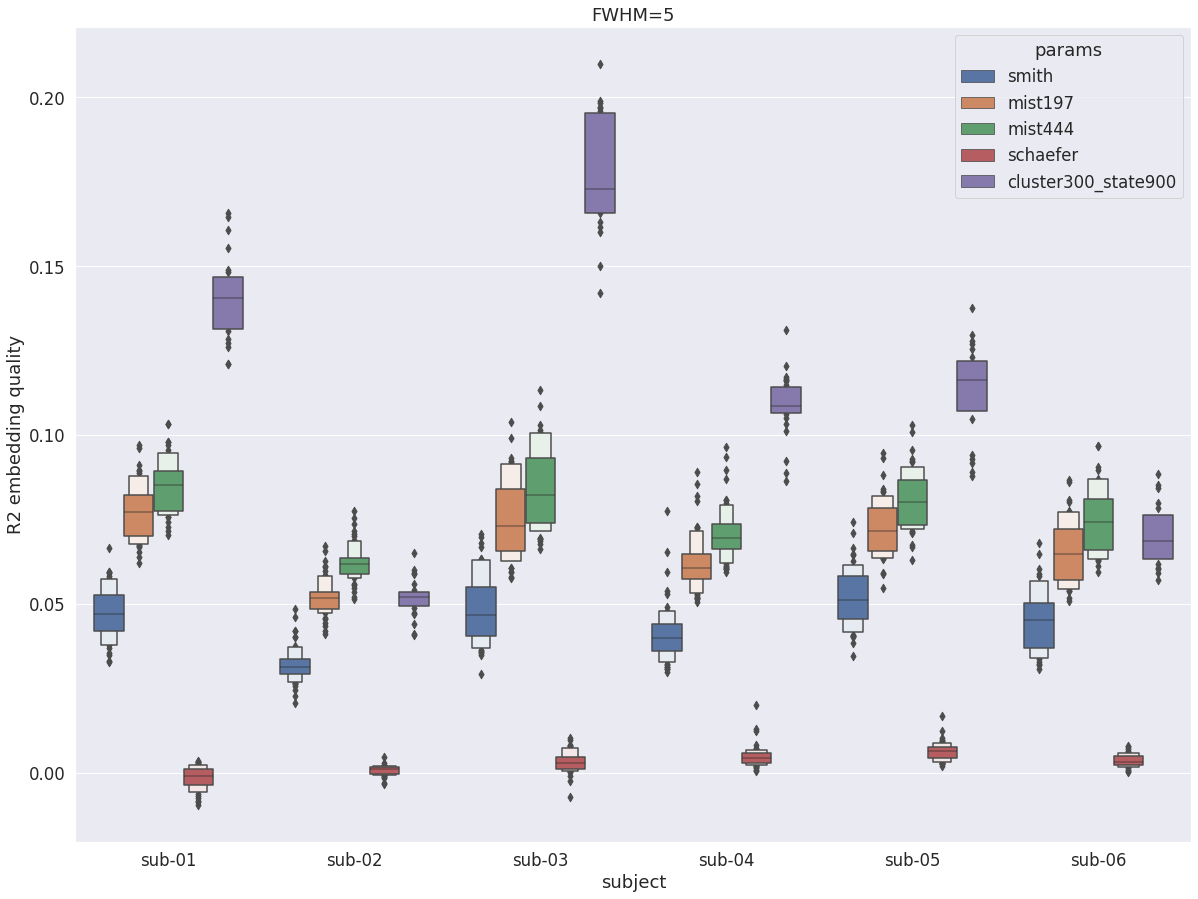

In [4]:
val_r2 = pd.read_pickle(smith70)
val_r2 = val_r2.append(pd.read_pickle(mist197))
val_r2 = val_r2.append(pd.read_pickle(mist444))
val_r2 = val_r2.append(pd.read_pickle(schaefer))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### DYPAC multi-resolution
When investigating the impact of numbers of `cluster` and `state` on the R2 of DYPAC parcellations, we can see that as expected increase in the number of states generally leads to higher R2. But for the first time we see exceptions: for two subjects (`sub-02` and `sub-06`), the larger number of states (`cluster-300_state-900`) actually has a lower average R2 than `cluster-50_state-300`. The values at medium resolutions are also in line with traditional group static parcellations.

Text(0.5, 1.0, 'FWHM=5')

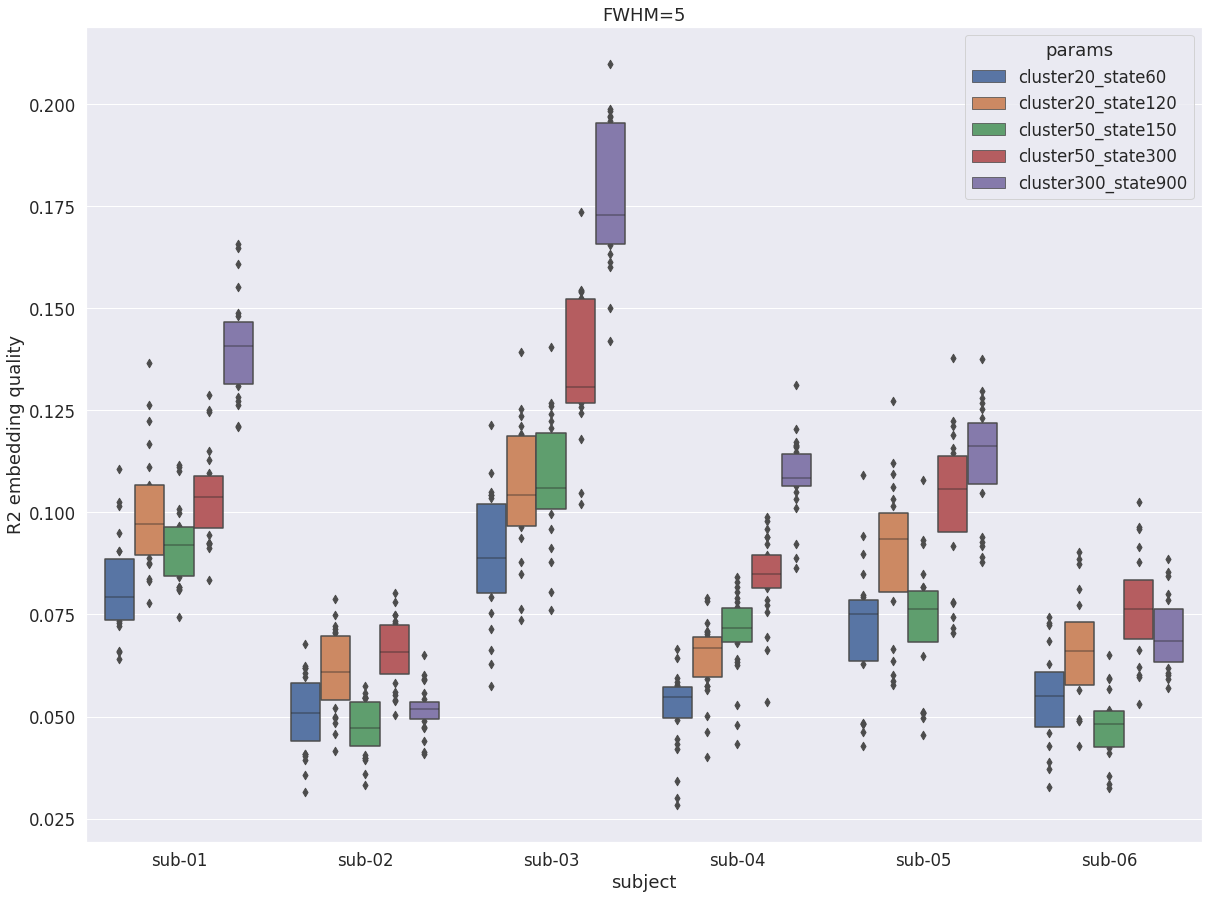

In [5]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### intra vs inter subject R2
Finally, intra-subject R2 is still higher than inter-subject R2, but compared with the cortex, there is a lot of overlap between the two distributions for all parameters `cluster` and `state`, with maximal overalp being observed again with `cluster-300_state-900`.

Text(0.5, 1.0, 'FWHM=5')

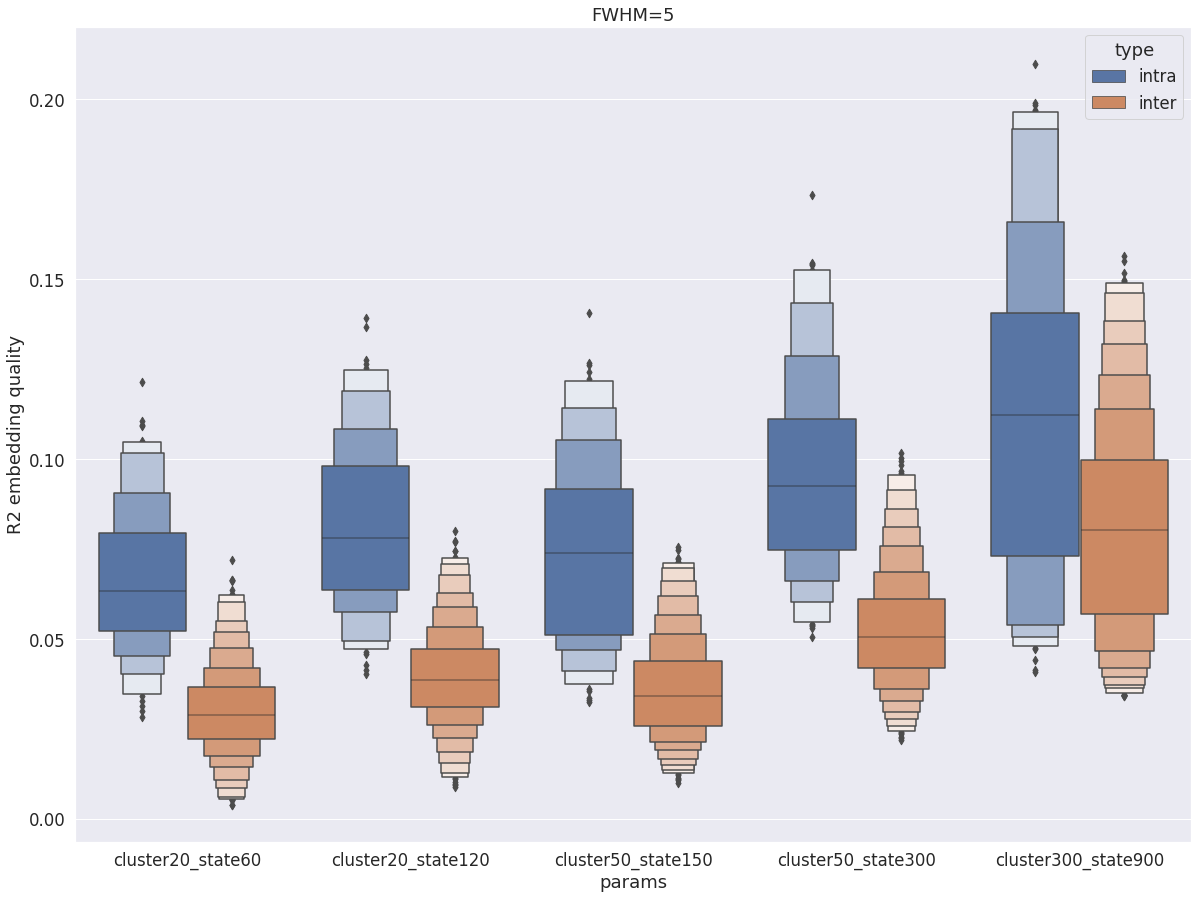

In [6]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))
val_r2 = val_r2.append(pd.read_pickle(inter60))
val_r2 = val_r2.append(pd.read_pickle(inter120))
val_r2 = val_r2.append(pd.read_pickle(inter150))
val_r2 = val_r2.append(pd.read_pickle(inter300))
val_r2 = val_r2.append(pd.read_pickle(inter900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='params', y='r2', hue='type', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

## R2 with `fwhm=8` 
### DYPAC intra vs DIFUMO

Interstingly, with `fwhm=8`, the results change almost completely. DYPAC parcellation (`cluster-300_state-900`) now outperforms even `difumo1024` for every subjects, in a way that is similar to what was observed in the cortex.

In [7]:
path_results = '/data/cisl/pbellec/cneuromod_embeddings/xp_202012/r2_friends-s01_central/'
fwhm = 8

# DYPAC
dypac60  = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-60.p')
dypac120 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-120.p')
dypac150 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-150.p')
dypac300 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-300.p')
dypac900 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-300_state-900.p')

# DYPAC inter-subject
inter60  = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-60.p')
inter120 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-120.p')
inter150 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-150.p')
inter300 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-300.p')
inter900 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-300_state-900.p')

# DIFUMO
difumo256  = os.path.join(path_results, f'r2_fwhm-difumo256_fwhm-{fwhm}.p')
difumo512  = os.path.join(path_results, f'r2_fwhm-difumo512_fwhm-{fwhm}.p')
difumo1024 = os.path.join(path_results, f'r2_fwhm-difumo1024_fwhm-{fwhm}.p')

# MIST
mist197 = os.path.join(path_results, f'r2_fwhm-mist197_fwhm-{fwhm}.p')
mist444 = os.path.join(path_results, f'r2_fwhm-mist444_fwhm-{fwhm}.p')

# Schaefer
schaefer = os.path.join(path_results, f'r2_fwhm-schaefer_fwhm-{fwhm}.p')

# Smith
smith70 = os.path.join(path_results, f'r2_fwhm-smith_fwhm-{fwhm}.p')

Text(0.5, 1.0, 'FWHM=8')

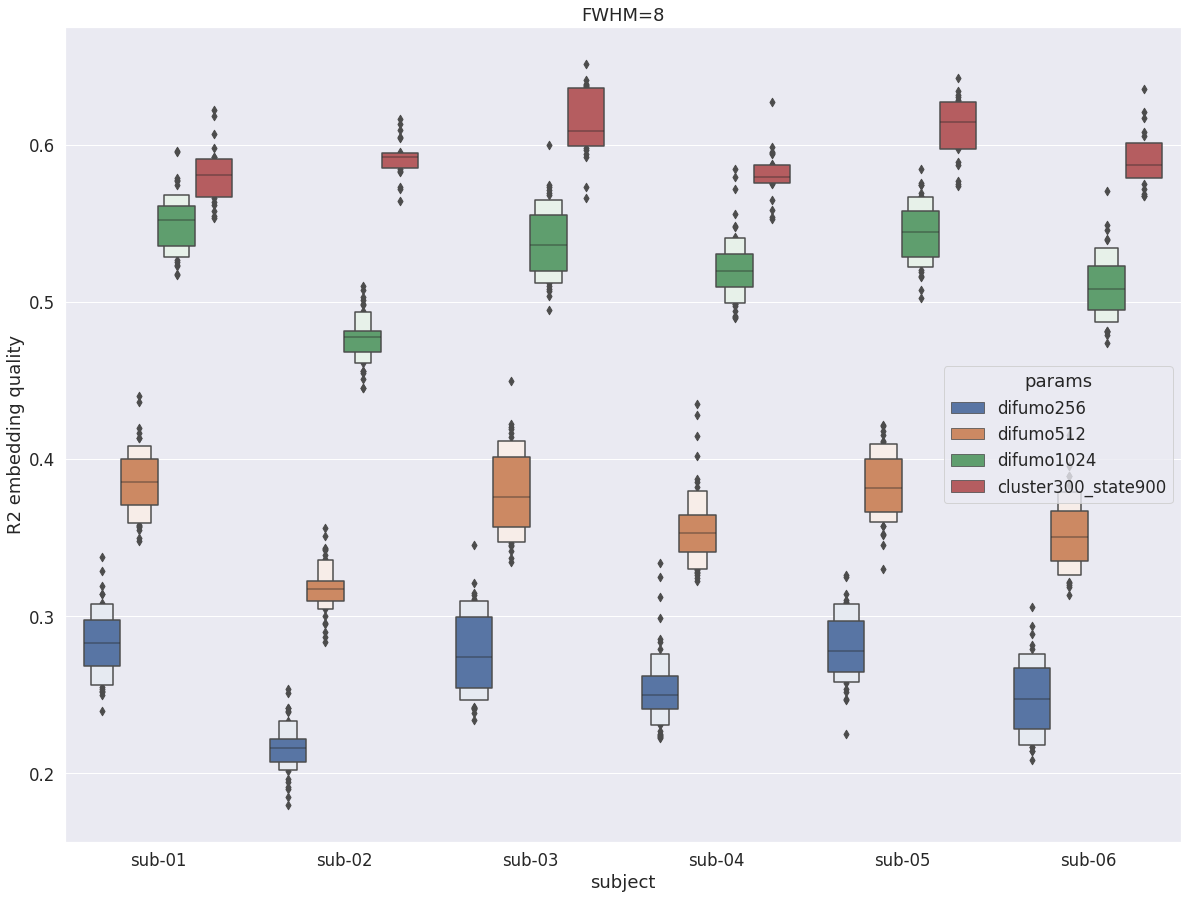

In [8]:
val_r2 = pd.read_pickle(difumo256)
val_r2 = val_r2.append(pd.read_pickle(difumo512))
val_r2 = val_r2.append(pd.read_pickle(difumo1024))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### DYPAC intra vs other group parcellations
When compared with traditional group parcellations, with `fwhm=8`, DYPAC parcellation (`cluster-300_state-900`) now lead to a massive increase of about 200% in R2.

Text(0.5, 1.0, 'FWHM=8')

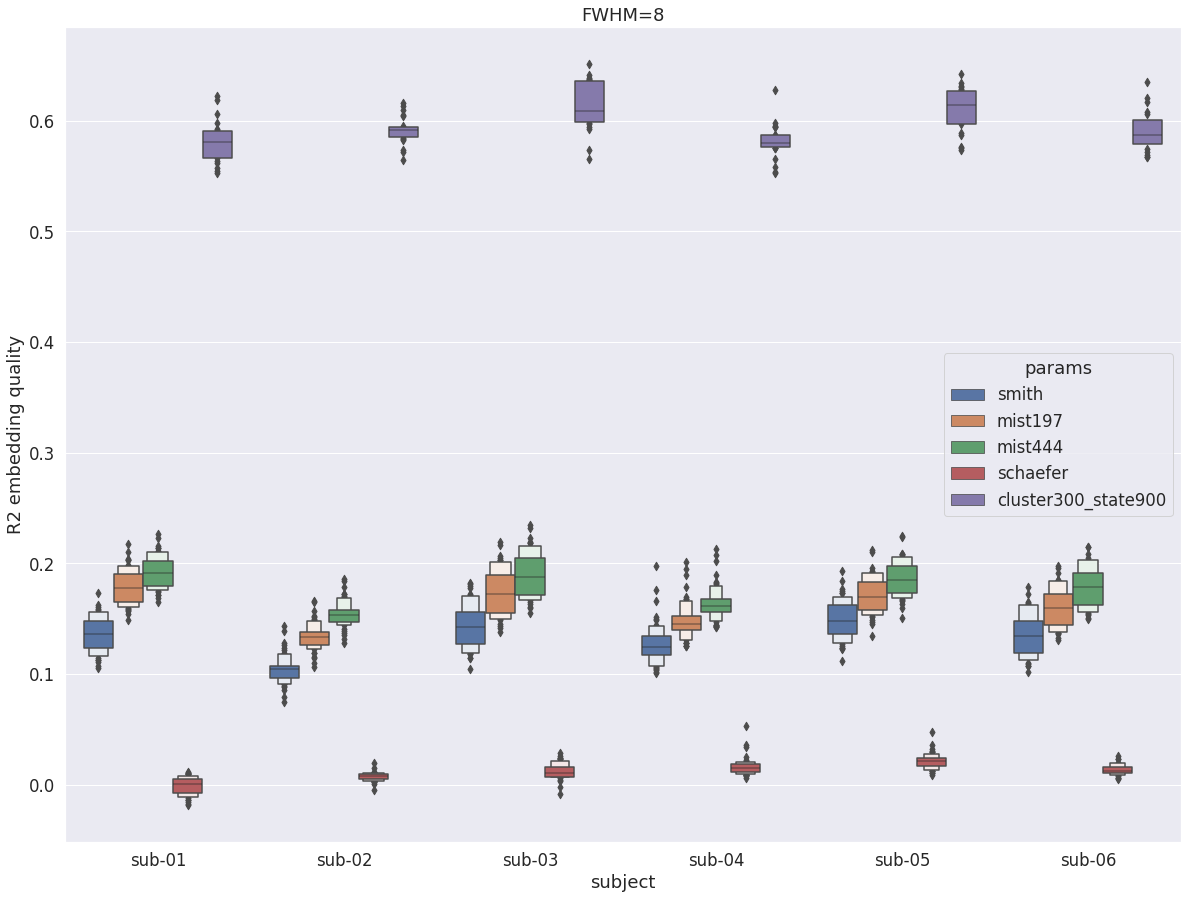

In [9]:
val_r2 = pd.read_pickle(smith70)
val_r2 = val_r2.append(pd.read_pickle(mist197))
val_r2 = val_r2.append(pd.read_pickle(mist444))
val_r2 = val_r2.append(pd.read_pickle(schaefer))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### DYPAC multi-resolution
When looking at the impact of parameters `cluster` and `state`, the usual increase in R2 for larger `state` is observed. However, there is now a very large boost in R2 for all subjects when going from `cluster-50_state-300` to `cluster-300_state-900`, which is very different from what observed in the cortex, or in the central structures with `fwhm=5`.

Text(0.5, 1.0, 'FWHM=8')

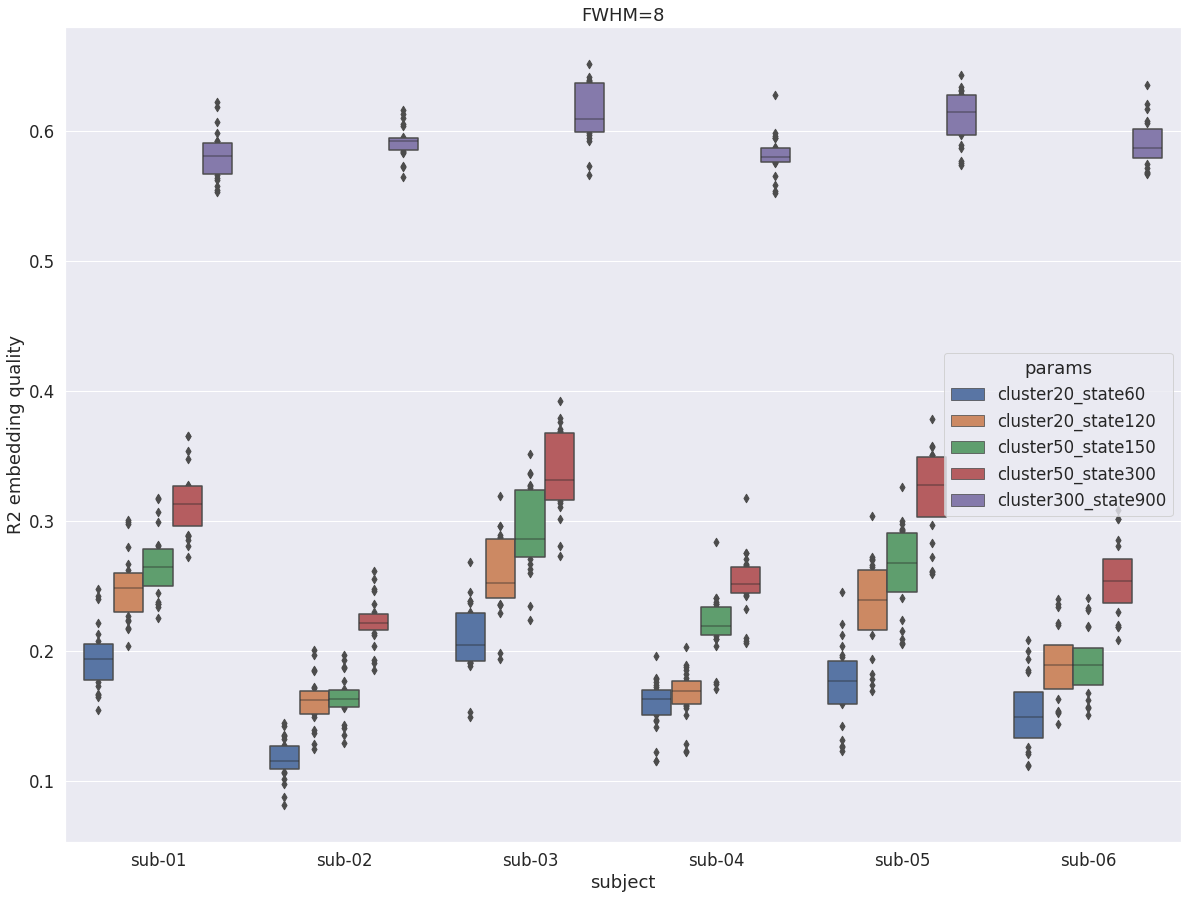

In [10]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### Intra vs inter subject R2
Finally, the intra-subject R2 values remain larger than inter-subject R2, but there is now a lot of overlap between the two distributions, and for `cluster-300_state-900` the difference has become small. This is a trend observed in the cortex and with `fwhm=5` as well, but it is much stronger with `fwhm=8` in the central structure, suggesting that a single group parcellation may be appropriate in central structures at such low resolution.

Text(0.5, 1.0, 'FWHM=8')

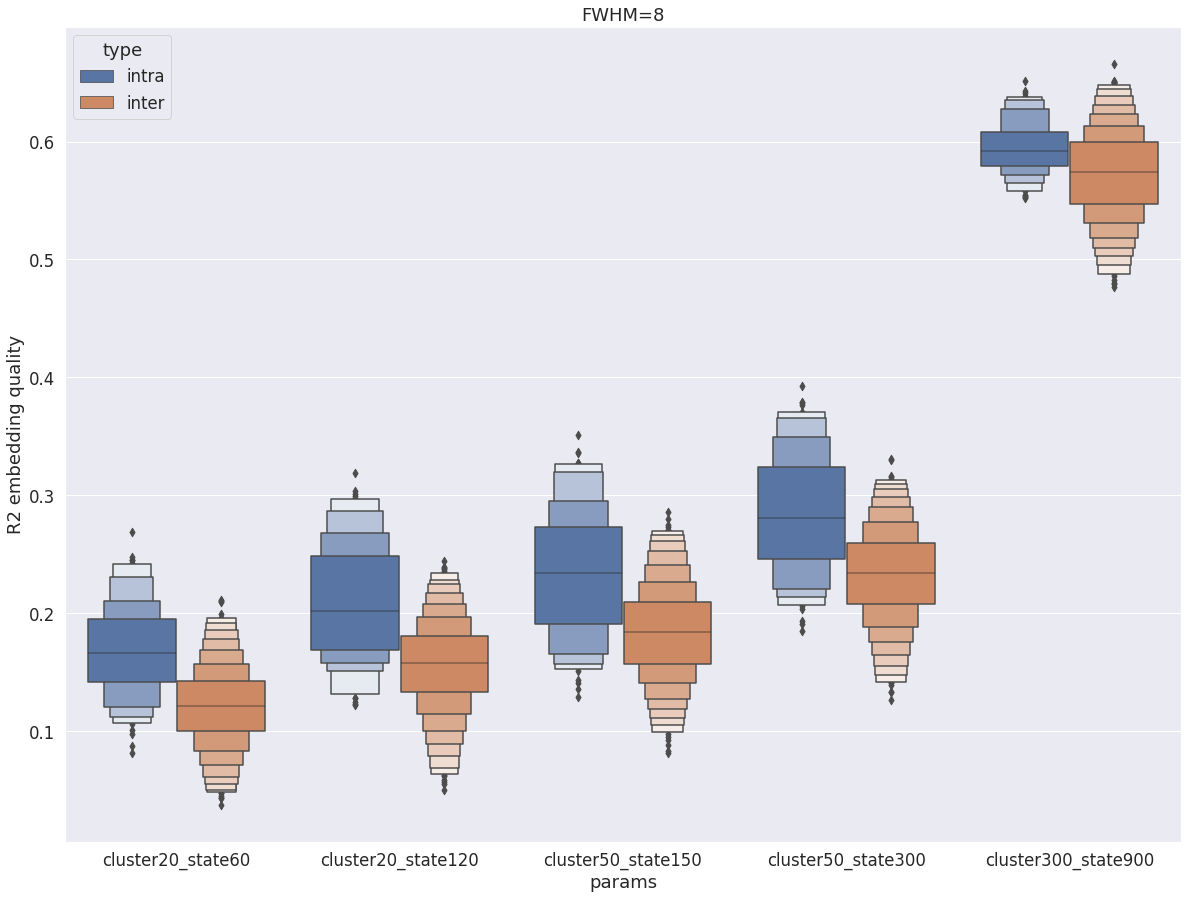

In [11]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))
val_r2 = val_r2.append(pd.read_pickle(inter60))
val_r2 = val_r2.append(pd.read_pickle(inter120))
val_r2 = val_r2.append(pd.read_pickle(inter150))
val_r2 = val_r2.append(pd.read_pickle(inter300))
val_r2 = val_r2.append(pd.read_pickle(inter900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='params', y='r2', hue='type', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')